In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [2]:
#to lod the dataset
df=pd.read_csv('bank.csv')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,0,20,0,257,1,-1,0,3,0
11158,39,7,1,1,0,733,0,0,2,16,6,83,4,-1,0,3,0
11159,32,9,2,1,0,29,0,0,0,19,1,156,2,-1,0,3,0
11160,43,9,1,1,0,0,0,1,0,8,8,9,2,172,5,0,0


In [3]:
df.dtypes

age          int64
job          int64
marital      int64
education    int64
default      int64
balance      int64
housing      int64
loan         int64
contact      int64
day          int64
month        int64
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome     int64
deposit      int64
dtype: object

In [4]:
df.isnull().sum()/df.shape[0]*100

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
deposit      0.0
dtype: float64

<Axes: >

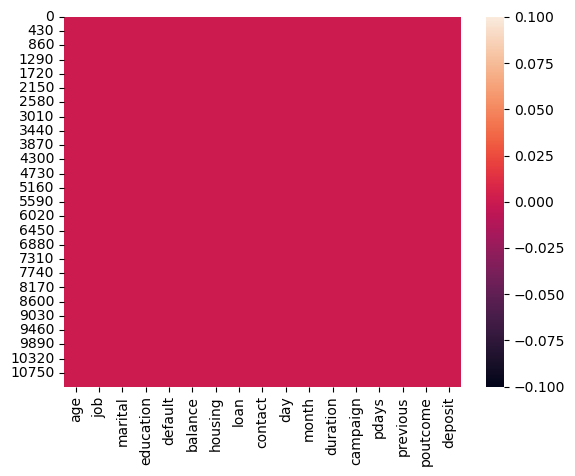

In [5]:
sb.heatmap(df.isnull())

In [6]:
df['deposit'].value_counts()

0    5873
1    5289
Name: deposit, dtype: int64

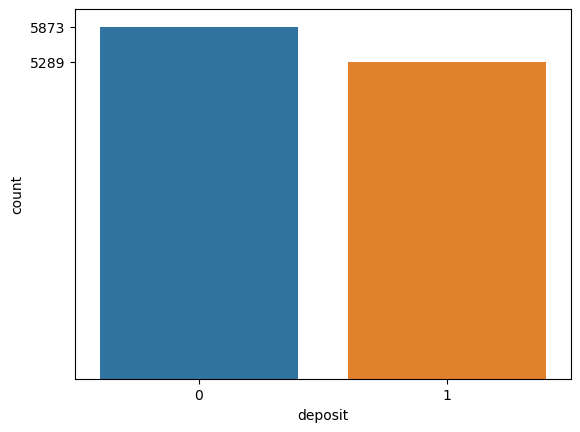

In [7]:
# #make countplot for deposit
sb.countplot(data=df,x='deposit')
f=df['deposit'].value_counts()
plt.yticks(f)
plt.show()

In [8]:
#select  input and output
X=df.drop('deposit',axis=1) #input
Y=df['deposit'] #output

In [9]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [10]:
X_train.shape

(7813, 16)

In [11]:
X_test.shape

(3349, 16)

In [12]:
Y_train.shape

(7813,)

In [13]:
Y_test.shape

(3349,)

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
ss=StandardScaler()

In [16]:
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [17]:
#create a user define function :passing argument and returning  value
def create_model(model):
    model.fit(X_train,Y_train) #rtrain model with 70% of data
    y_pred=model.predict(X_test) #test the model with 30% of data
    #generate rport 
    print(classification_report(Y_test,y_pred))
#confusion matrix
    print(confusion_matrix(Y_test,y_pred))
    return model


In [18]:
#logistic Regression
from sklearn.linear_model import LogisticRegression

#creat an object for logisticRegression
lr=LogisticRegression()

In [19]:
from sklearn.metrics import classification_report,confusion_matrix

In [20]:
#calling the function with help of logisticRegression

lr=create_model(lr)

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1760
           1       0.79      0.77      0.78      1589

    accuracy                           0.80      3349
   macro avg       0.80      0.80      0.80      3349
weighted avg       0.80      0.80      0.80      3349

[[1441  319]
 [ 359 1230]]


In [21]:
#decision Tree classifier
from sklearn.tree import DecisionTreeClassifier

In [22]:
for i in range(1,101):
    dtc=DecisionTreeClassifier(random_state=i)
    print("random state",i)
    
    dtc=create_model(dtc)

random state 1
              precision    recall  f1-score   support

           0       0.79      0.80      0.80      1760
           1       0.78      0.77      0.77      1589

    accuracy                           0.78      3349
   macro avg       0.78      0.78      0.78      3349
weighted avg       0.78      0.78      0.78      3349

[[1407  353]
 [ 372 1217]]
random state 2
              precision    recall  f1-score   support

           0       0.79      0.80      0.80      1760
           1       0.78      0.77      0.77      1589

    accuracy                           0.79      3349
   macro avg       0.79      0.79      0.79      3349
weighted avg       0.79      0.79      0.79      3349

[[1414  346]
 [ 365 1224]]
random state 3
              precision    recall  f1-score   support

           0       0.79      0.80      0.79      1760
           1       0.77      0.76      0.77      1589

    accuracy                           0.78      3349
   macro avg       0.78      

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1760
           1       0.78      0.77      0.78      1589

    accuracy                           0.79      3349
   macro avg       0.79      0.79      0.79      3349
weighted avg       0.79      0.79      0.79      3349

[[1410  350]
 [ 361 1228]]
random state 26
              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1760
           1       0.78      0.77      0.77      1589

    accuracy                           0.79      3349
   macro avg       0.79      0.79      0.79      3349
weighted avg       0.79      0.79      0.79      3349

[[1419  341]
 [ 371 1218]]
random state 27
              precision    recall  f1-score   support

           0       0.79      0.80      0.80      1760
           1       0.78      0.77      0.77      1589

    accuracy                           0.79      3349
   macro avg       0.79      0.78      0.7

              precision    recall  f1-score   support

           0       0.79      0.80      0.80      1760
           1       0.78      0.77      0.77      1589

    accuracy                           0.79      3349
   macro avg       0.78      0.78      0.78      3349
weighted avg       0.79      0.79      0.79      3349

[[1414  346]
 [ 373 1216]]
random state 51
              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1760
           1       0.78      0.76      0.77      1589

    accuracy                           0.79      3349
   macro avg       0.79      0.79      0.79      3349
weighted avg       0.79      0.79      0.79      3349

[[1418  342]
 [ 374 1215]]
random state 52
              precision    recall  f1-score   support

           0       0.80      0.81      0.80      1760
           1       0.78      0.77      0.78      1589

    accuracy                           0.79      3349
   macro avg       0.79      0.79      0.7

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1760
           1       0.78      0.78      0.78      1589

    accuracy                           0.79      3349
   macro avg       0.79      0.79      0.79      3349
weighted avg       0.79      0.79      0.79      3349

[[1414  346]
 [ 357 1232]]
random state 75
              precision    recall  f1-score   support

           0       0.79      0.80      0.80      1760
           1       0.78      0.77      0.77      1589

    accuracy                           0.78      3349
   macro avg       0.78      0.78      0.78      3349
weighted avg       0.78      0.78      0.78      3349

[[1409  351]
 [ 372 1217]]
random state 76
              precision    recall  f1-score   support

           0       0.79      0.80      0.79      1760
           1       0.78      0.76      0.77      1589

    accuracy                           0.78      3349
   macro avg       0.78      0.78      0.7

[[1423  337]
 [ 373 1216]]
random state 99
              precision    recall  f1-score   support

           0       0.79      0.80      0.80      1760
           1       0.78      0.76      0.77      1589

    accuracy                           0.78      3349
   macro avg       0.78      0.78      0.78      3349
weighted avg       0.78      0.78      0.78      3349

[[1412  348]
 [ 375 1214]]
random state 100
              precision    recall  f1-score   support

           0       0.79      0.80      0.80      1760
           1       0.78      0.77      0.77      1589

    accuracy                           0.79      3349
   macro avg       0.79      0.79      0.79      3349
weighted avg       0.79      0.79      0.79      3349

[[1406  354]
 [ 363 1226]]


In [23]:
dtc=DecisionTreeClassifier(random_state=43)
dtc=create_model(dtc)

              precision    recall  f1-score   support

           0       0.80      0.81      0.81      1760
           1       0.79      0.78      0.78      1589

    accuracy                           0.80      3349
   macro avg       0.79      0.79      0.79      3349
weighted avg       0.80      0.80      0.80      3349

[[1424  336]
 [ 349 1240]]


In [24]:
dict={"Features":X.columns,'Information_Gain':dtc.feature_importances_}


df1=pd.DataFrame(dict)
df1

,Features,Information_Gain
0,age,0.077727
1,job,0.038054
2,marital,0.018294
3,education,0.014744
4,default,0.000713
5,balance,0.084855
6,housing,0.043811
7,loan,0.006772
8,contact,0.062115
9,day,0.075494


In [25]:
for i in range(1,9):
    dtc1=DecisionTreeClassifier(random_state=1,max_depth=i)
    print("Max Depth",i)
    dtc1=create_model(dtc1)

Max Depth 1
              precision    recall  f1-score   support

           0       0.79      0.62      0.69      1760
           1       0.66      0.81      0.73      1589

    accuracy                           0.71      3349
   macro avg       0.72      0.72      0.71      3349
weighted avg       0.73      0.71      0.71      3349

[[1092  668]
 [ 296 1293]]
Max Depth 2
              precision    recall  f1-score   support

           0       0.79      0.62      0.69      1760
           1       0.66      0.81      0.73      1589

    accuracy                           0.71      3349
   macro avg       0.72      0.72      0.71      3349
weighted avg       0.73      0.71      0.71      3349

[[1092  668]
 [ 296 1293]]
Max Depth 3
              precision    recall  f1-score   support

           0       0.85      0.69      0.76      1760
           1       0.71      0.86      0.78      1589

    accuracy                           0.77      3349
   macro avg       0.78      0.78     

In [26]:
dtc1=DecisionTreeClassifier(random_state=1,max_depth=5)
dtc1=create_model(dtc1)

              precision    recall  f1-score   support

           0       0.85      0.75      0.80      1760
           1       0.75      0.86      0.80      1589

    accuracy                           0.80      3349
   macro avg       0.80      0.80      0.80      3349
weighted avg       0.81      0.80      0.80      3349

[[1316  444]
 [ 228 1361]]


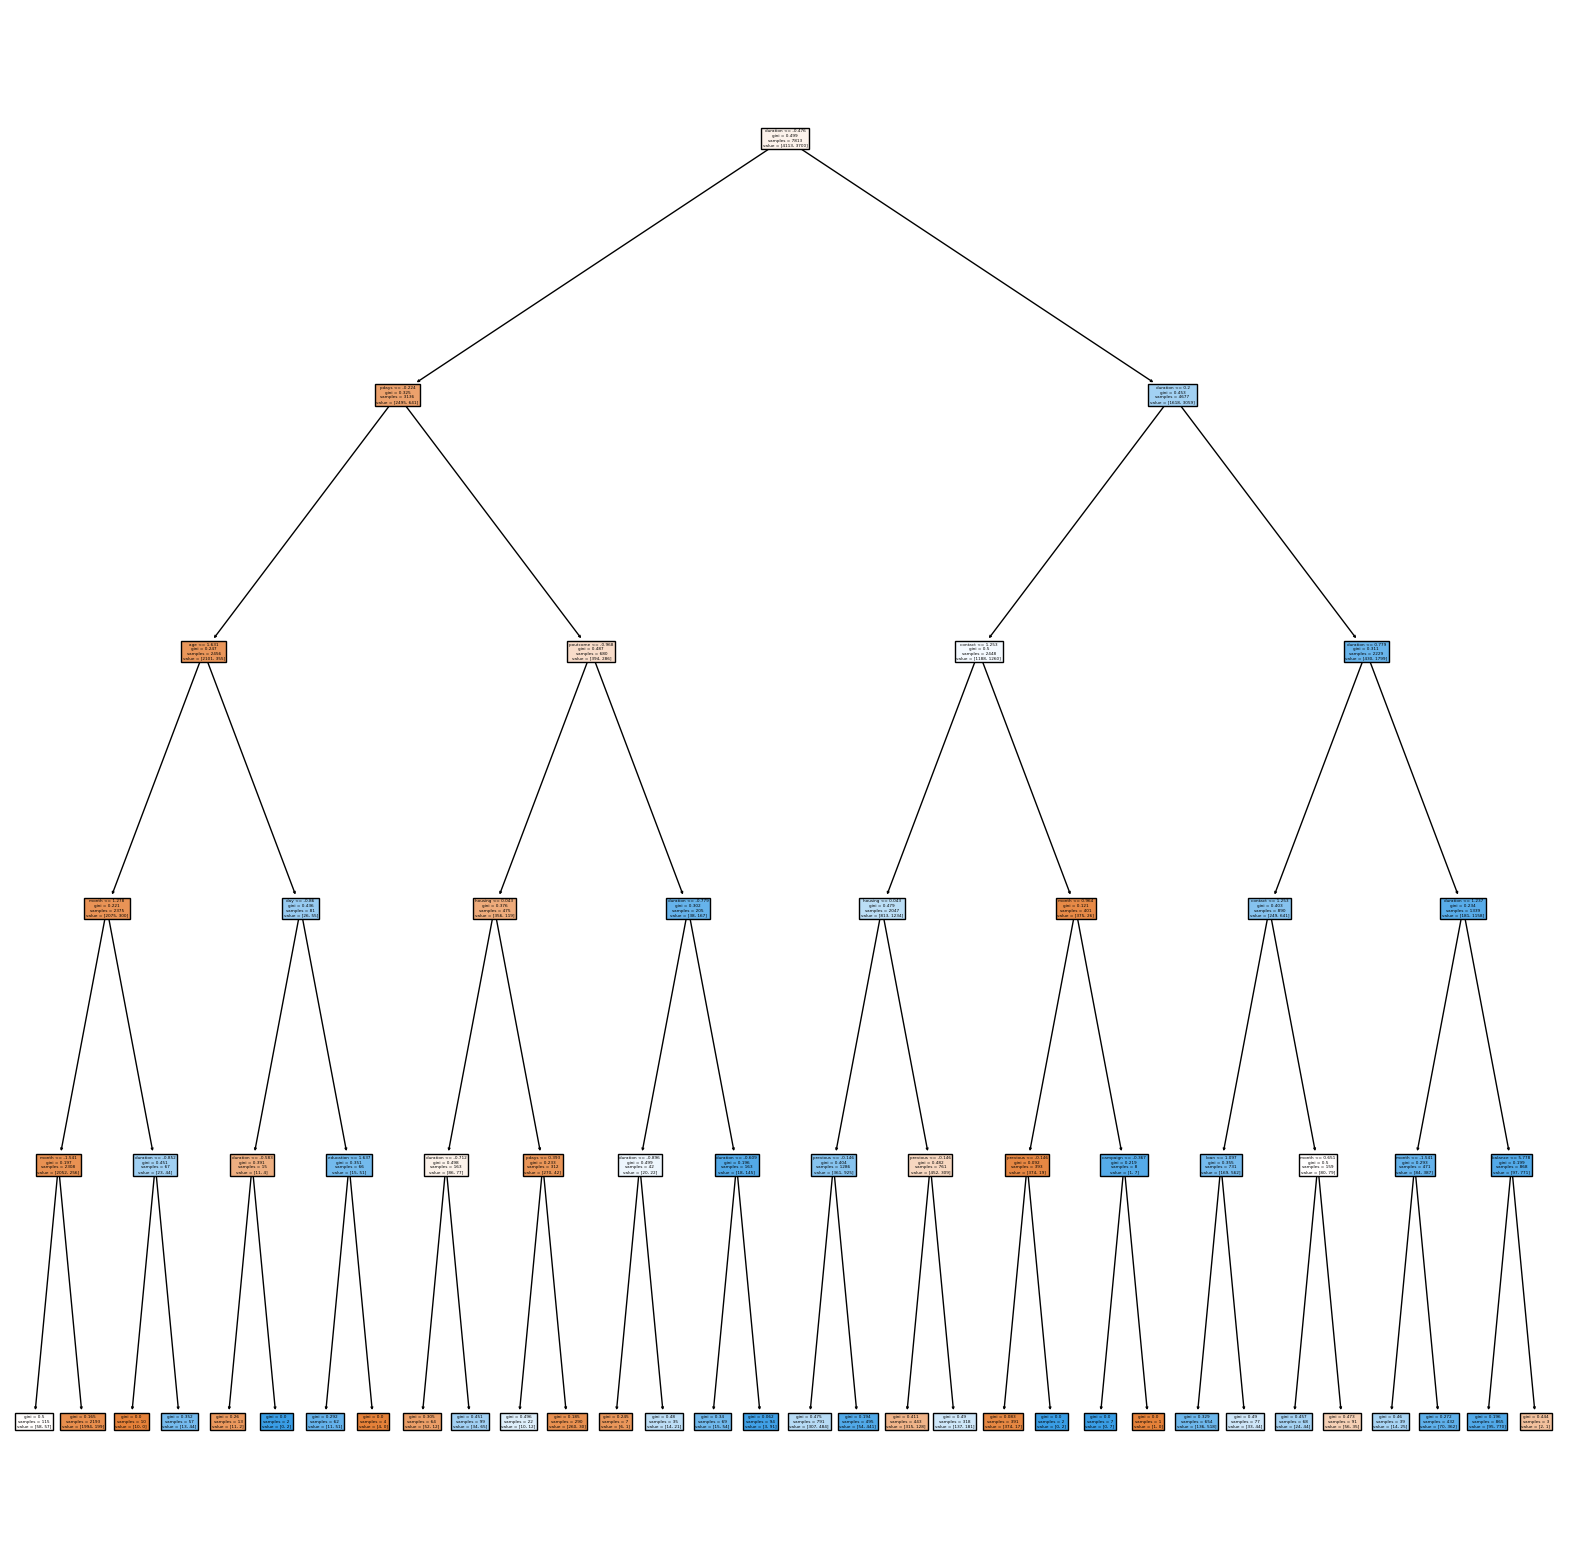

In [27]:
#create  a tree 
from sklearn import tree
feature=X.columns
plt.figure(figsize=(20,20))
_=tree.plot_tree(dtc1,feature_names=feature,filled=True)

In [31]:
# for i in range(1,45):
#     dtc2=DecisionTreeClassifier(random_state=1,min_samples_leaf=i)
#     print("random_state",i)
#     dtc2=create_model(dtc2)

random_state 1
              precision    recall  f1-score   support

           0       0.79      0.80      0.80      1760
           1       0.78      0.77      0.77      1589

    accuracy                           0.78      3349
   macro avg       0.78      0.78      0.78      3349
weighted avg       0.78      0.78      0.78      3349

[[1407  353]
 [ 372 1217]]
random_state 2
              precision    recall  f1-score   support

           0       0.77      0.82      0.79      1760
           1       0.79      0.72      0.75      1589

    accuracy                           0.77      3349
   macro avg       0.78      0.77      0.77      3349
weighted avg       0.78      0.77      0.77      3349

[[1447  313]
 [ 443 1146]]
random_state 3
              precision    recall  f1-score   support

           0       0.78      0.81      0.80      1760
           1       0.78      0.75      0.77      1589

    accuracy                           0.78      3349
   macro avg       0.78      

              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1760
           1       0.80      0.86      0.83      1589

    accuracy                           0.83      3349
   macro avg       0.83      0.83      0.83      3349
weighted avg       0.83      0.83      0.83      3349

[[1415  345]
 [ 228 1361]]
random_state 26
              precision    recall  f1-score   support

           0       0.86      0.81      0.83      1760
           1       0.80      0.85      0.82      1589

    accuracy                           0.83      3349
   macro avg       0.83      0.83      0.83      3349
weighted avg       0.83      0.83      0.83      3349

[[1417  343]
 [ 239 1350]]
random_state 27
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1760
           1       0.80      0.85      0.82      1589

    accuracy                           0.83      3349
   macro avg       0.83      0.83      0.8

In [32]:
dtc2=DecisionTreeClassifier(random_state=1,min_samples_leaf=43)
dtc2=create_model(dtc2)

              precision    recall  f1-score   support

           0       0.87      0.80      0.83      1760
           1       0.79      0.87      0.83      1589

    accuracy                           0.83      3349
   macro avg       0.83      0.83      0.83      3349
weighted avg       0.83      0.83      0.83      3349

[[1400  360]
 [ 213 1376]]


In [33]:
#using Entropy and Maxdepth
for i in range(1,9):
    dtc3=DecisionTreeClassifier(random_state=1,max_depth=i,criterion='entropy')
    print("Max Depth",i)
    dtc3=create_model(dtc3)

Max Depth 1
              precision    recall  f1-score   support

           0       0.79      0.62      0.69      1760
           1       0.66      0.81      0.73      1589

    accuracy                           0.71      3349
   macro avg       0.72      0.72      0.71      3349
weighted avg       0.73      0.71      0.71      3349

[[1092  668]
 [ 296 1293]]
Max Depth 2
              precision    recall  f1-score   support

           0       0.79      0.62      0.69      1760
           1       0.66      0.81      0.73      1589

    accuracy                           0.71      3349
   macro avg       0.72      0.72      0.71      3349
weighted avg       0.73      0.71      0.71      3349

[[1092  668]
 [ 296 1293]]
Max Depth 3
              precision    recall  f1-score   support

           0       0.80      0.72      0.76      1760
           1       0.72      0.80      0.76      1589

    accuracy                           0.76      3349
   macro avg       0.76      0.76     

In [35]:
for i in range(1,45):
    dtc4=DecisionTreeClassifier(random_state=1,min_samples_leaf=i,criterion='entropy')
    print("Max Depth",i)
    dtc4=create_model(dtc4)

Max Depth 1
              precision    recall  f1-score   support

           0       0.78      0.81      0.80      1760
           1       0.79      0.75      0.77      1589

    accuracy                           0.78      3349
   macro avg       0.78      0.78      0.78      3349
weighted avg       0.78      0.78      0.78      3349

[[1433  327]
 [ 394 1195]]
Max Depth 2
              precision    recall  f1-score   support

           0       0.77      0.83      0.80      1760
           1       0.79      0.72      0.75      1589

    accuracy                           0.78      3349
   macro avg       0.78      0.77      0.78      3349
weighted avg       0.78      0.78      0.78      3349

[[1458  302]
 [ 444 1145]]
Max Depth 3
              precision    recall  f1-score   support

           0       0.79      0.82      0.80      1760
           1       0.79      0.76      0.77      1589

    accuracy                           0.79      3349
   macro avg       0.79      0.79     

              precision    recall  f1-score   support

           0       0.83      0.82      0.82      1760
           1       0.80      0.82      0.81      1589

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349

[[1439  321]
 [ 291 1298]]
Max Depth 25
              precision    recall  f1-score   support

           0       0.83      0.82      0.82      1760
           1       0.80      0.82      0.81      1589

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349

[[1441  319]
 [ 293 1296]]
Max Depth 26
              precision    recall  f1-score   support

           0       0.83      0.82      0.83      1760
           1       0.80      0.82      0.81      1589

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82     

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
rfc=RandomForestClassifier()

In [39]:
# for i in range(1,25):
#     rfc=RandomForestClassifier(max_features=i,random_state=1)
#     print('Maxfeatures ',i)
#     rfc=create_model(rfc)

Maxfeatures  1
              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1760
           1       0.80      0.84      0.82      1589

    accuracy                           0.83      3349
   macro avg       0.83      0.83      0.83      3349
weighted avg       0.83      0.83      0.83      3349

[[1429  331]
 [ 250 1339]]
Maxfeatures  2
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1760
           1       0.81      0.87      0.84      1589

    accuracy                           0.84      3349
   macro avg       0.84      0.84      0.84      3349
weighted avg       0.84      0.84      0.84      3349

[[1428  332]
 [ 208 1381]]
Maxfeatures  3
              precision    recall  f1-score   support

           0       0.88      0.82      0.85      1760
           1       0.82      0.87      0.84      1589

    accuracy                           0.85      3349
   macro avg       0.85      

              precision    recall  f1-score   support

           0       0.88      0.82      0.85      1760
           1       0.81      0.87      0.84      1589

    accuracy                           0.85      3349
   macro avg       0.85      0.85      0.85      3349
weighted avg       0.85      0.85      0.85      3349

[[1445  315]
 [ 203 1386]]


In [40]:
rfc=RandomForestClassifier(max_features=9,random_state=1)
rfc=create_model(rfc)

              precision    recall  f1-score   support

           0       0.88      0.82      0.85      1760
           1       0.82      0.88      0.85      1589

    accuracy                           0.85      3349
   macro avg       0.85      0.85      0.85      3349
weighted avg       0.85      0.85      0.85      3349

[[1446  314]
 [ 196 1393]]


In [41]:
from sklearn.ensemble import AdaBoostClassifier

In [43]:
for i in range(1,25):
    ada=AdaBoostClassifier(random_state=1,n_estimators=i)
    print("n estimator",i)
    ada=create_model(ada)

n estimator 1
              precision    recall  f1-score   support

           0       0.79      0.62      0.69      1760
           1       0.66      0.81      0.73      1589

    accuracy                           0.71      3349
   macro avg       0.72      0.72      0.71      3349
weighted avg       0.73      0.71      0.71      3349

[[1092  668]
 [ 296 1293]]
n estimator 2
              precision    recall  f1-score   support

           0       0.74      0.75      0.75      1760
           1       0.72      0.72      0.72      1589

    accuracy                           0.73      3349
   macro avg       0.73      0.73      0.73      3349
weighted avg       0.73      0.73      0.73      3349

[[1313  447]
 [ 450 1139]]
n estimator 3
              precision    recall  f1-score   support

           0       0.80      0.72      0.76      1760
           1       0.72      0.80      0.76      1589

    accuracy                           0.76      3349
   macro avg       0.76      0.7

              precision    recall  f1-score   support

           0       0.82      0.83      0.82      1760
           1       0.81      0.80      0.80      1589

    accuracy                           0.81      3349
   macro avg       0.81      0.81      0.81      3349
weighted avg       0.81      0.81      0.81      3349

[[1456  304]
 [ 325 1264]]


In [44]:
from sklearn.ensemble  import GradientBoostingClassifier

In [45]:
for i in range(1,40):
    gbc=GradientBoostingClassifier(random_state=1,n_estimators=i)
    print("No of estimators:",i)
    gbc=create_model(gbc)

No of estimators: 1
              precision    recall  f1-score   support

           0       0.63      0.94      0.75      1760
           1       0.86      0.38      0.52      1589

    accuracy                           0.67      3349
   macro avg       0.74      0.66      0.64      3349
weighted avg       0.74      0.67      0.64      3349

[[1660  100]
 [ 992  597]]
No of estimators: 2
              precision    recall  f1-score   support

           0       0.68      0.88      0.77      1760
           1       0.80      0.54      0.64      1589

    accuracy                           0.72      3349
   macro avg       0.74      0.71      0.71      3349
weighted avg       0.74      0.72      0.71      3349

[[1546  214]
 [ 732  857]]
No of estimators: 3
              precision    recall  f1-score   support

           0       0.80      0.77      0.79      1760
           1       0.76      0.78      0.77      1589

    accuracy                           0.78      3349
   macro avg  

              precision    recall  f1-score   support

           0       0.83      0.79      0.81      1760
           1       0.78      0.83      0.80      1589

    accuracy                           0.81      3349
   macro avg       0.81      0.81      0.81      3349
weighted avg       0.81      0.81      0.81      3349

[[1385  375]
 [ 276 1313]]
No of estimators: 24
              precision    recall  f1-score   support

           0       0.83      0.80      0.82      1760
           1       0.79      0.83      0.81      1589

    accuracy                           0.81      3349
   macro avg       0.81      0.81      0.81      3349
weighted avg       0.81      0.81      0.81      3349

[[1404  356]
 [ 278 1311]]
No of estimators: 25
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1760
           1       0.79      0.83      0.81      1589

    accuracy                           0.81      3349
   macro avg       0.81      0.8

In [46]:
from xgboost import XGBClassifier

In [47]:
xgb=XGBClassifier()

In [49]:
for i in range(1,61):
    xgb=XGBClassifier(random_state=1,n_estimators=i)
    print("n_estimators",i)
    xgb=create_model(xgb)

n_estimators 1
              precision    recall  f1-score   support

           0       0.84      0.78      0.81      1760
           1       0.77      0.83      0.80      1589

    accuracy                           0.80      3349
   macro avg       0.80      0.80      0.80      3349
weighted avg       0.81      0.80      0.80      3349

[[1368  392]
 [ 266 1323]]
n_estimators 2
              precision    recall  f1-score   support

           0       0.85      0.79      0.82      1760
           1       0.79      0.85      0.82      1589

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349

[[1395  365]
 [ 241 1348]]
n_estimators 3
              precision    recall  f1-score   support

           0       0.85      0.80      0.82      1760
           1       0.79      0.84      0.82      1589

    accuracy                           0.82      3349
   macro avg       0.82      

              precision    recall  f1-score   support

           0       0.88      0.83      0.85      1760
           1       0.82      0.87      0.85      1589

    accuracy                           0.85      3349
   macro avg       0.85      0.85      0.85      3349
weighted avg       0.85      0.85      0.85      3349

[[1461  299]
 [ 203 1386]]
n_estimators 29
              precision    recall  f1-score   support

           0       0.88      0.83      0.85      1760
           1       0.82      0.87      0.85      1589

    accuracy                           0.85      3349
   macro avg       0.85      0.85      0.85      3349
weighted avg       0.85      0.85      0.85      3349

[[1462  298]
 [ 200 1389]]
n_estimators 30
              precision    recall  f1-score   support

           0       0.88      0.83      0.86      1760
           1       0.83      0.87      0.85      1589

    accuracy                           0.85      3349
   macro avg       0.85      0.85      0.8

              precision    recall  f1-score   support

           0       0.89      0.83      0.86      1760
           1       0.83      0.88      0.85      1589

    accuracy                           0.86      3349
   macro avg       0.86      0.86      0.86      3349
weighted avg       0.86      0.86      0.86      3349

[[1463  297]
 [ 188 1401]]
n_estimators 55
              precision    recall  f1-score   support

           0       0.89      0.83      0.86      1760
           1       0.83      0.88      0.85      1589

    accuracy                           0.85      3349
   macro avg       0.86      0.86      0.85      3349
weighted avg       0.86      0.85      0.85      3349

[[1464  296]
 [ 190 1399]]
n_estimators 56
              precision    recall  f1-score   support

           0       0.88      0.83      0.86      1760
           1       0.82      0.88      0.85      1589

    accuracy                           0.85      3349
   macro avg       0.85      0.86      0.8

In [50]:
xgb=XGBClassifier(random_state=1,n_estimators=54)
xgb=create_model(xgb)

              precision    recall  f1-score   support

           0       0.89      0.83      0.86      1760
           1       0.83      0.88      0.85      1589

    accuracy                           0.86      3349
   macro avg       0.86      0.86      0.86      3349
weighted avg       0.86      0.86      0.86      3349

[[1463  297]
 [ 188 1401]]


In [51]:
#bank XGB is Best with 86 percent accuracy and second one in Random Forest Classifier= 85